<a href="https://colab.research.google.com/github/fatemafaria142/Skin-Concern-Identification/blob/main/skin_concern_identification_using_MobileNetV2_mbert_early_fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")

# Ignore the FutureWarning related to use_inf_as_na in seaborn
warnings.filterwarnings("ignore", message="use_inf_as_na is deprecated")

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Unzip a zip file in Google Colab**

In [5]:

# Import the ZipFile class from the zipfile module
from zipfile import ZipFile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Skin Concern Identification Dataset.zip'

# Specify the extraction directory
extract_dir = '/content/drive/MyDrive/'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of zip file in current directory
    zip_ref.extractall(extract_dir)

# Print a message indicating successful extraction
print(f"Zip file '{zip_file_path}' has been successfully extracted to '{extract_dir}'.")


Zip file '/content/drive/MyDrive/Skin Concern Identification Dataset.zip' has been successfully extracted to '/content/drive/MyDrive/'.


# **Train Dataset Manipulation**

In [6]:
import os
import pandas as pd

# Define the main folder path
main_folder = "/content/drive/MyDrive/Skin Concern Identification Dataset"

# Create an empty list to store dataframes
dfs = []

# Iterate through the train folders
train_folder = os.path.join(main_folder, 'train')
for label_folder in os.listdir(train_folder):
    label_path = os.path.join(train_folder, label_folder)

    # Iterate through images in the label folder
    for image_file in os.listdir(label_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # accepting png, jpg, and jpeg
            image_id, extension = os.path.splitext(image_file)

            # Full path to the image
            image_path = os.path.join(label_path, image_file)

            # Read corresponding text file
            txt_file_path = os.path.join(label_path, f"{image_id}.txt")
            with open(txt_file_path, 'r') as txt_file:
                disease_symptoms = txt_file.read().strip()

            # Create a dataframe for each row
            row_df = pd.DataFrame({
                'image_id': [image_id],
                'image_path': [image_path],  # Include the full path of the image
                'disease_symptoms': [disease_symptoms],
                'label': [label_folder]
            })
            dfs.append(row_df)

# Concatenate the dataframes into a single dataframe
train_df = pd.concat(dfs, ignore_index=True)

In [7]:
# Display the first few rows of the DataFrame
train_df.head()

,image_id,image_path,disease_symptoms,label
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,"I have been experiencing persistent breakouts,...",Acne-Prone Skin
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,When typical acne lesions are accompanied with...,Acne-Prone Skin
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,The appearance of deep-seated cysts and nodule...,Acne-Prone Skin
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,Deep-seated cysts and nodules amid typical acn...,Acne-Prone Skin
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,The presence of deep-seated cysts and nodules ...,Acne-Prone Skin


In [8]:
# Display the last few rows of the DataFrame
train_df.tail()

,image_id,image_path,disease_symptoms,label
315,image_78,/content/drive/MyDrive/Skin Concern Identifica...,I just became aware of particular patches on m...,Rosacea-Prone Skin
316,image_79,/content/drive/MyDrive/Skin Concern Identifica...,I've noticed specific regions on my skin displ...,Rosacea-Prone Skin
317,image_8,/content/drive/MyDrive/Skin Concern Identifica...,I have seen patches of my skin showing symptom...,Rosacea-Prone Skin
318,image_80,/content/drive/MyDrive/Skin Concern Identifica...,I've noticed specific regions on my skin displ...,Rosacea-Prone Skin
319,image_9,/content/drive/MyDrive/Skin Concern Identifica...,I've been observing specific areas on my skin ...,Rosacea-Prone Skin


# **Test Dataset Manipulation**

In [9]:
import os
import pandas as pd

# Define the main folder path
main_folder = "/content/drive/MyDrive/Skin Concern Identification Dataset"

# Create an empty list to store dataframes
dfs = []

# Iterate through the test folders
test_folder = os.path.join(main_folder, 'test')
for label_folder in os.listdir(test_folder):
    label_path = os.path.join(test_folder, label_folder)

    # Iterate through images in the label folder
    for image_file in os.listdir(label_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # accepting png, jpg, and jpeg
            image_id, extension = os.path.splitext(image_file)

            # Full path to the image
            image_path = os.path.join(label_path, image_file)

            # Read corresponding text file
            txt_file_path = os.path.join(label_path, f"{image_id}.txt")
            with open(txt_file_path, 'r') as txt_file:
                disease_symptoms = txt_file.read().strip()

            # Create a dataframe for each row
            row_df = pd.DataFrame({
                'image_id': [image_id],
                'image_path': [image_path],  # Include the full path of the image
                'disease_symptoms': [disease_symptoms],
                'label': [label_folder]
            })
            dfs.append(row_df)

# Concatenate the dataframes into a single dataframe
test_df = pd.concat(dfs, ignore_index=True)

In [10]:
# Display the first few rows of the DataFrame
test_df.head()

,image_id,image_path,disease_symptoms,label
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,"My skin, once a whisper-soft lullaby, now sing...",Acne-Prone Skin
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,Managing an ongoing skin eruption that include...,Acne-Prone Skin
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,Managing a continuing skin eruption that compr...,Acne-Prone Skin
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,Managing a continuing skin eruption characteri...,Acne-Prone Skin
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,"My skin, which was once a bright kaleidoscope ...",Acne-Prone Skin


In [11]:
# Display the last few rows of the DataFrame
test_df.tail()

,image_id,image_path,disease_symptoms,label
55,image_5,/content/drive/MyDrive/Skin Concern Identifica...,I've recently become aware of areas on my skin...,Rosacea-Prone Skin
56,image_6,/content/drive/MyDrive/Skin Concern Identifica...,I've been increasingly aware of certain areas ...,Rosacea-Prone Skin
57,image_7,/content/drive/MyDrive/Skin Concern Identifica...,I've observed distinct regions on my skin that...,Rosacea-Prone Skin
58,image_8,/content/drive/MyDrive/Skin Concern Identifica...,"Recently, I've noticed specific areas on my sk...",Rosacea-Prone Skin
59,image_9,/content/drive/MyDrive/Skin Concern Identifica...,I've recently become aware of specific areas o...,Rosacea-Prone Skin


# **Validation Dataset Manipulation**

In [12]:
import os
import pandas as pd

# Define the main folder path
main_folder = "/content/drive/MyDrive/Skin Concern Identification Dataset"

# Create an empty list to store dataframes
dfs = []

# Iterate through the validation folders
validation_folder = os.path.join(main_folder, 'validation')
for label_folder in os.listdir(validation_folder):
    label_path = os.path.join(validation_folder, label_folder)

    # Iterate through images in the label folder
    for image_file in os.listdir(label_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # accepting png, jpg, and jpeg
            image_id, extension = os.path.splitext(image_file)

            # Full path to the image
            image_path = os.path.join(label_path, image_file)

            # Read corresponding text file
            txt_file_path = os.path.join(label_path, f"{image_id}.txt")
            with open(txt_file_path, 'r') as txt_file:
                disease_symptoms = txt_file.read().strip()

            # Create a dataframe for each row
            row_df = pd.DataFrame({
                'image_id': [image_id],
                'image_path': [image_path],  # Include the full path of the image
                'disease_symptoms': [disease_symptoms],
                'label': [label_folder]
            })
            dfs.append(row_df)

# Concatenate the dataframes into a single dataframe
validation_df = pd.concat(dfs, ignore_index=True)

In [13]:
# Display the first few rows of the DataFrame
validation_df.head()

,image_id,image_path,disease_symptoms,label
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,"My skin, which was once a whisper-soft a sooth...",Acne-Prone Skin
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,Managing an ongoing skin eruption that include...,Acne-Prone Skin
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,Managing a continuing skin eruption that compr...,Acne-Prone Skin
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,Managing a continuing skin eruption characteri...,Acne-Prone Skin
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,"My skin, which was once a bright kaleidoscope ...",Acne-Prone Skin


In [14]:
# Display the last few rows of the DataFrame
validation_df.tail()

,image_id,image_path,disease_symptoms,label
55,image_5,/content/drive/MyDrive/Skin Concern Identifica...,I have seen patches of my skin showing symptom...,Rosacea-Prone Skin
56,image_6,/content/drive/MyDrive/Skin Concern Identifica...,I've been observing specific areas on my skin ...,Rosacea-Prone Skin
57,image_7,/content/drive/MyDrive/Skin Concern Identifica...,I've noticed that certain areas of my skin exh...,Rosacea-Prone Skin
58,image_8,/content/drive/MyDrive/Skin Concern Identifica...,My skin has started exhibiting rosacea signs i...,Rosacea-Prone Skin
59,image_9,/content/drive/MyDrive/Skin Concern Identifica...,Patches of my skin have begun exhibiting signs...,Rosacea-Prone Skin


# **Text Preprocessing**

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove extra spaces
    text = ' '.join(text.split())

    # Remove punctuation, single quotes, and double dashes
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(r'--', ' ', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    return ' '.join(filtered_text)

# Apply the preprocessing function to the 'disease_symptoms' column in train, test, and validation dataframes
train_df['disease_symptoms'] = train_df['disease_symptoms'].apply(preprocess_text)
test_df['disease_symptoms'] = test_df['disease_symptoms'].apply(preprocess_text)
validation_df['disease_symptoms'] = validation_df['disease_symptoms'].apply(preprocess_text)


* This code uses fit_transform on the training data to fit the encoder and transform the labels. Then, it uses transform on the test and validation data to apply the encoding using the same fitted encoder.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column in the training dataframe
train_df['label_encoded'] = label_encoder.fit_transform(train_df['label'])

# Print the mapping of original labels to encoded values
print("Label Encoding Mapping:")
for original_label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_label}: {encoded_value}")

# Transform the 'label' column in the test and validation dataframes
test_df['label_encoded'] = label_encoder.transform(test_df['label'])
validation_df['label_encoded'] = label_encoder.transform(validation_df['label'])


Label Encoding Mapping:
Acne-Prone Skin: 0
Hyperpigmented Skin: 1
Hypopigmented Skin: 2
Rosacea-Prone Skin: 3


# **Train Dataset After Text Preprocessing**

In [56]:
train_df.head()

,image_id,image_path,disease_symptoms,label,label_encoded
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,experiencing persistent breakouts including pi...,Acne-Prone Skin,0
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,typical acne lesions accompanied deepseated cy...,Acne-Prone Skin,0
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,appearance deepseated cysts nodules amid typic...,Acne-Prone Skin,0
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,deepseated cysts nodules amid typical acne les...,Acne-Prone Skin,0
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,presence deepseated cysts nodules together typ...,Acne-Prone Skin,0


In [19]:
# Get information about columns, data types, and missing values
print("\nInformation about the train dataset:")
print(train_df.info())


Information about the train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          320 non-null    object
 1   image_path        320 non-null    object
 2   disease_symptoms  320 non-null    object
 3   label             320 non-null    object
 4   label_encoded     320 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 12.6+ KB
None


# **Test Dataset After Text Preprocessing**

In [57]:
test_df.head()

,image_id,image_path,disease_symptoms,label,label_encoded
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,skin whispersoft lullaby sings harsh opera inf...,Acne-Prone Skin,0
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,managing ongoing skin eruption includes standa...,Acne-Prone Skin,0
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,managing continuing skin eruption comprises us...,Acne-Prone Skin,0
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,managing continuing skin eruption characterize...,Acne-Prone Skin,0
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,skin bright kaleidoscope emotions dulled unwan...,Acne-Prone Skin,0


In [21]:
# Get information about columns, data types, and missing values
print("\nInformation about the test dataset:")
print(test_df.info())


Information about the test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          60 non-null     object
 1   image_path        60 non-null     object
 2   disease_symptoms  60 non-null     object
 3   label             60 non-null     object
 4   label_encoded     60 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB
None


# **Validation Dataset After Text Preprocessing**

In [58]:
validation_df.head()

,image_id,image_path,disease_symptoms,label,label_encoded
0,image_1,/content/drive/MyDrive/Skin Concern Identifica...,skin whispersoft soothing song performs harsh ...,Acne-Prone Skin,0
1,image_10,/content/drive/MyDrive/Skin Concern Identifica...,managing ongoing skin eruption includes standa...,Acne-Prone Skin,0
2,image_11,/content/drive/MyDrive/Skin Concern Identifica...,managing continuing skin eruption comprises us...,Acne-Prone Skin,0
3,image_12,/content/drive/MyDrive/Skin Concern Identifica...,managing continuing skin eruption characterize...,Acne-Prone Skin,0
4,image_13,/content/drive/MyDrive/Skin Concern Identifica...,skin bright kaleidoscope emotions dulled unwan...,Acne-Prone Skin,0


In [23]:
# Get information about columns, data types, and missing values
print("\nInformation about the validation dataset:")
print(validation_df.info())


Information about the validation dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          60 non-null     object
 1   image_path        60 non-null     object
 2   disease_symptoms  60 non-null     object
 3   label             60 non-null     object
 4   label_encoded     60 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB
None


# **Image size in train dataset**

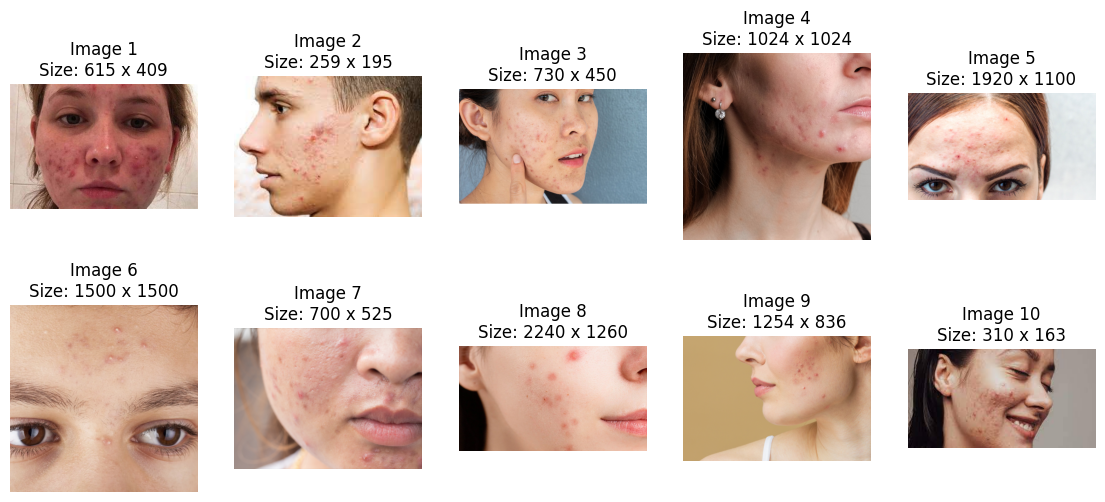

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the first 10 images in the train_df DataFrame
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i in range(10):
    image_path = train_df['image_path'].iloc[i]
    image = Image.open(image_path)

    # Display the image in a subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Image {i + 1}\nSize: {image.size[0]} x {image.size[1]}")
    axes[row, col].axis('off')  # Turn off axis labels

plt.show()


# **Image size in test dataset**

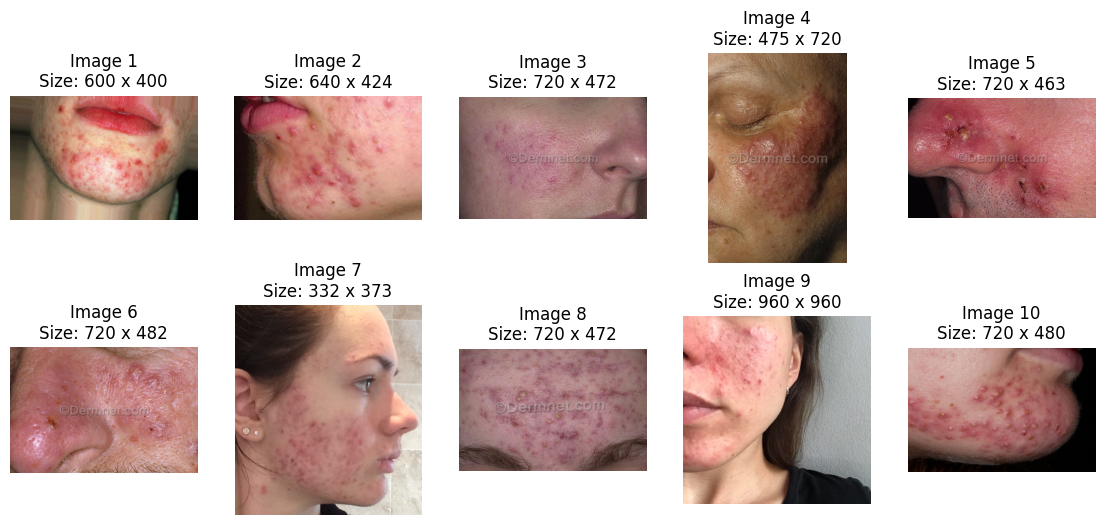

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the first 10 images in the test_df DataFrame
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i in range(10):
    image_path = test_df['image_path'].iloc[i]
    image = Image.open(image_path)

    # Display the image in a subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Image {i + 1}\nSize: {image.size[0]} x {image.size[1]}")
    axes[row, col].axis('off')  # Turn off axis labels

plt.show()


# **Image size in validation dataset**

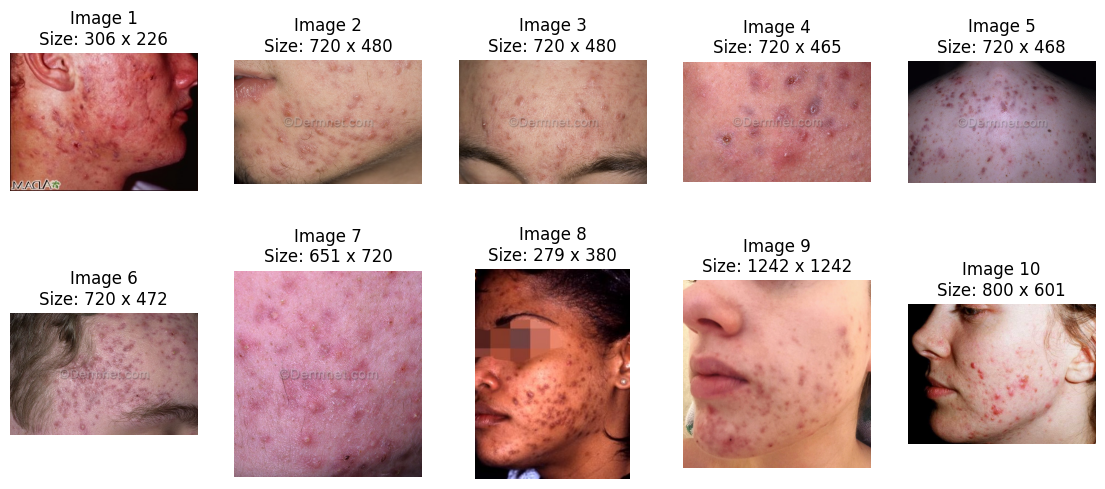

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the first 10 images in the validation_df DataFrame
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i in range(10):
    image_path = validation_df['image_path'].iloc[i]
    image = Image.open(image_path)

    # Display the image in a subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Image {i + 1}\nSize: {image.size[0]} x {image.size[1]}")
    axes[row, col].axis('off')  # Turn off axis labels

plt.show()


# **Visualization of Label Distribution in Train Dataset**


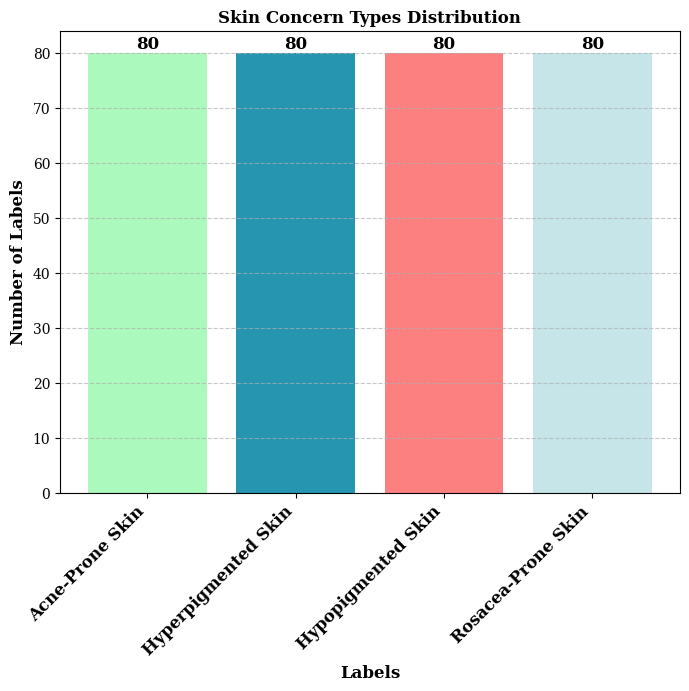

In [27]:
label_counts = train_df['label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#acf9bd', '#2595b0','#fc8080','#c5e5e8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(8, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Skin Concern Types Distribution', fontdict=font)
plt.xlabel('Labels', fontdict=font)
plt.ylabel('Number of Labels', fontdict=font)

# Rotate x-axis labels
plt.xticks(label_counts.index, label_counts.index, rotation=45, ha='right', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Text Length Distribution in Train Dataset**

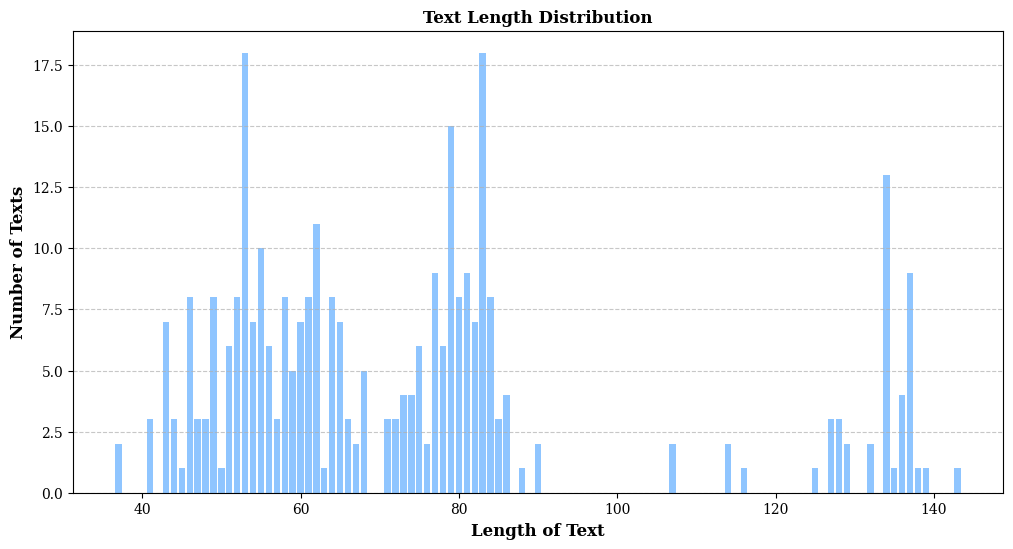

In [28]:
# Visualize text length distribution with a bar plot
text_lengths = train_df['disease_symptoms'].apply(lambda x: len(x.split()))

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Define custom colors for the bars
custom_colors = ['#60adff']

# Get unique text lengths and their counts
unique_lengths, counts = np.unique(text_lengths, return_counts=True)

plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(unique_lengths, counts, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution', fontdict=font)
plt.xlabel('Length of Text', fontdict=font)
plt.ylabel('Number of Texts', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Checking if there is any null values in the train dataset**

In [29]:
# Check for null values in  'path', 'label', and 'text' columns
null_image = train_df['image_path'].isnull().sum()
null_label = train_df['label'].isnull().sum()
null_text = train_df['disease_symptoms'].isnull().sum()

print(f"Null values in 'image': {null_image}")
print(f"Null values in 'label': {null_label}")
print(f"Null values in 'text': {null_text}")

Null values in 'image': 0
Null values in 'label': 0
Null values in 'text': 0


# **Visualization of Label Distribution in Test Dataset**


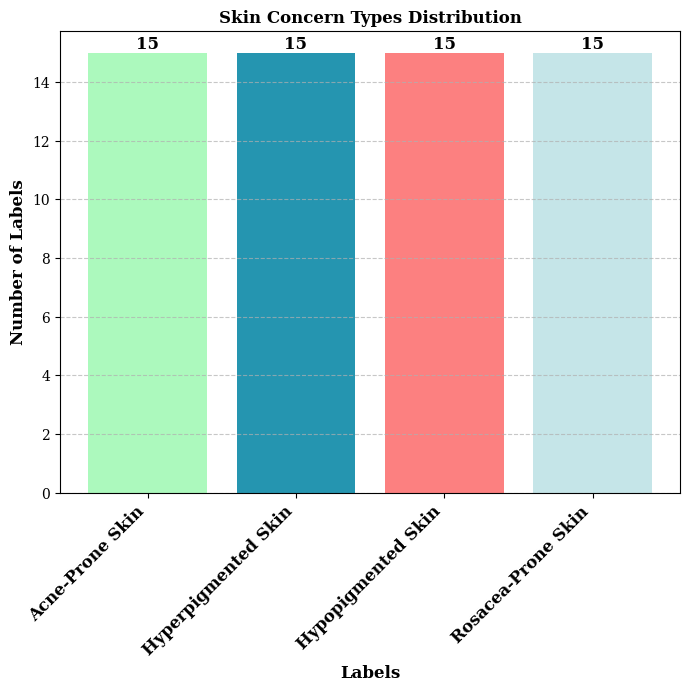

In [30]:
label_counts = test_df['label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#acf9bd', '#2595b0','#fc8080','#c5e5e8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(8, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Skin Concern Types Distribution', fontdict=font)
plt.xlabel('Labels', fontdict=font)
plt.ylabel('Number of Labels', fontdict=font)

# Rotate x-axis labels
plt.xticks(label_counts.index, label_counts.index, rotation=45, ha='right', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Text Length Distribution in Test Dataset**

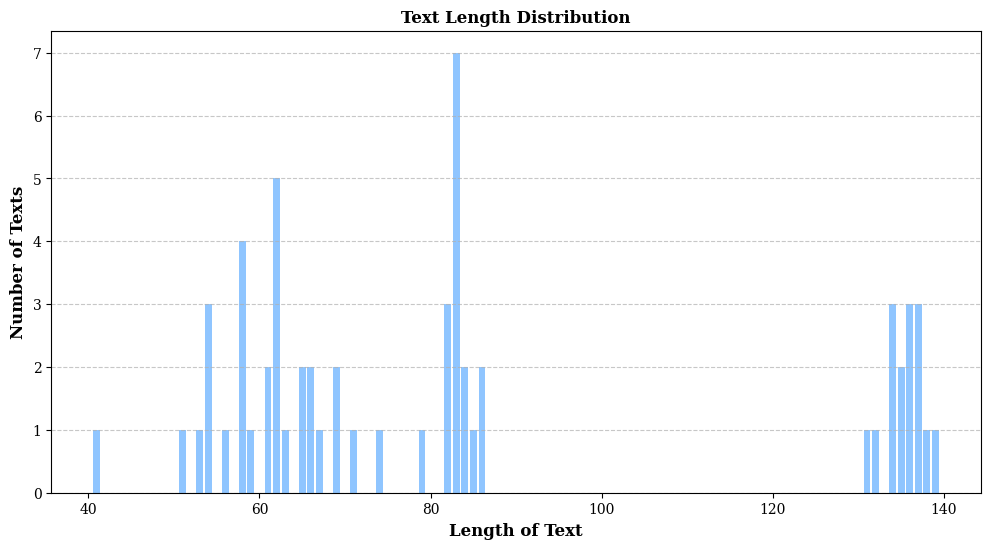

In [31]:
# Visualize text length distribution with a bar plot
text_lengths = test_df['disease_symptoms'].apply(lambda x: len(x.split()))

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Define custom colors for the bars
custom_colors = ['#60adff']

# Get unique text lengths and their counts
unique_lengths, counts = np.unique(text_lengths, return_counts=True)

plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(unique_lengths, counts, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution', fontdict=font)
plt.xlabel('Length of Text', fontdict=font)
plt.ylabel('Number of Texts', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Checking if there is any null values in the test dataset**

In [32]:
# Check for null values in  'path', 'label', and 'text' columns
null_image = test_df['image_path'].isnull().sum()
null_label = test_df['label'].isnull().sum()
null_text = test_df['disease_symptoms'].isnull().sum()

print(f"Null values in 'image': {null_image}")
print(f"Null values in 'label': {null_label}")
print(f"Null values in 'text': {null_text}")

Null values in 'image': 0
Null values in 'label': 0
Null values in 'text': 0


# **Visualization of Label Distribution in Validation Dataset**


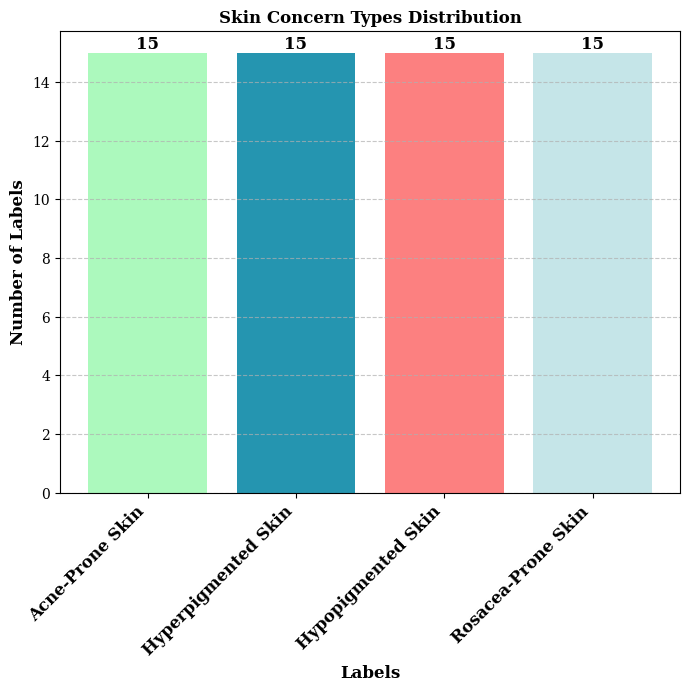

In [33]:
label_counts = validation_df['label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#acf9bd', '#2595b0','#fc8080','#c5e5e8']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(8, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Skin Concern Types Distribution', fontdict=font)
plt.xlabel('Labels', fontdict=font)
plt.ylabel('Number of Labels', fontdict=font)

# Rotate x-axis labels
plt.xticks(label_counts.index, label_counts.index, rotation=45, ha='right', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Text Length Distribution in Validation Dataset**

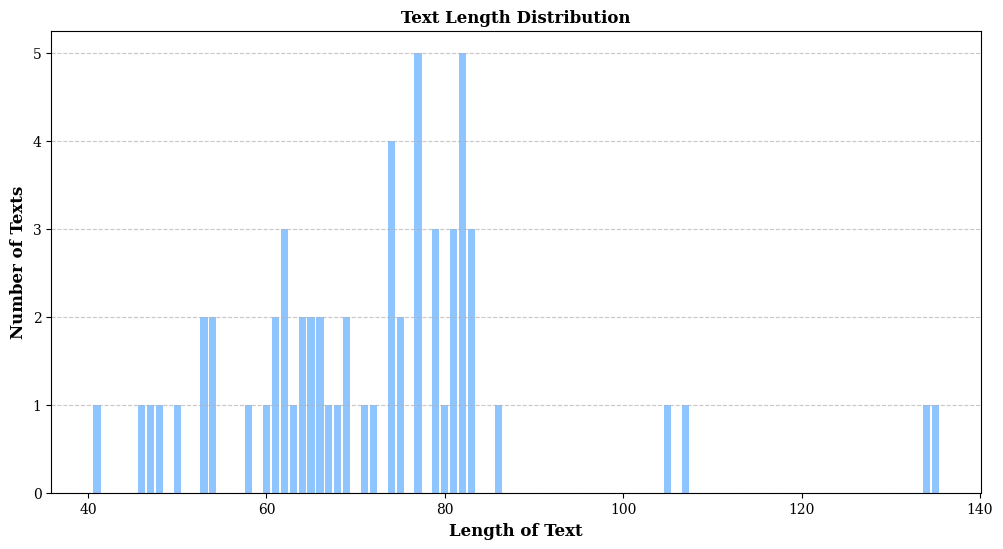

In [34]:
# Visualize text length distribution with a bar plot
text_lengths = validation_df['disease_symptoms'].apply(lambda x: len(x.split()))

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Define custom colors for the bars
custom_colors = ['#60adff']

# Get unique text lengths and their counts
unique_lengths, counts = np.unique(text_lengths, return_counts=True)

plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(unique_lengths, counts, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution', fontdict=font)
plt.xlabel('Length of Text', fontdict=font)
plt.ylabel('Number of Texts', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Checking if there is any null values in the validation dataset**

In [35]:
# Check for null values in  'path', 'label', and 'text' columns
null_image = test_df['image_path'].isnull().sum()
null_label = test_df['label'].isnull().sum()
null_text = test_df['disease_symptoms'].isnull().sum()

print(f"Null values in 'image': {null_image}")
print(f"Null values in 'label': {null_label}")
print(f"Null values in 'text': {null_text}")

Null values in 'image': 0
Null values in 'label': 0
Null values in 'text': 0


In [36]:
!pip install torch torchvision transformers

In [37]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from transformers import BertTokenizer, BertModel
import torchvision.models as models

# **Custom Multimodal Dataset**

In [38]:
from torchvision import transforms

# Define transformations using transforms.Compose
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(),    # Randomly flip the image vertically
    transforms.ToTensor()
])

class MyMultimodalDataset(Dataset):
    def __init__(self, image_paths, texts, labels, transform=None):
        self.image_paths = image_paths
        self.texts = texts
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        text = self.texts[idx]
        label = self.labels[idx]

        # Load and preprocess image
        image = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)  # Apply the composed transformation

        return image, text, label


# **Dataset and Dataloader**

In [40]:
# Create custom datasets with MyMultimodalDataset
train_dataset = MyMultimodalDataset(train_df['image_path'], train_df['disease_symptoms'], train_df['label_encoded'], transform=transform)
test_dataset = MyMultimodalDataset(test_df['image_path'], test_df['disease_symptoms'], test_df['label_encoded'], transform=transform)
val_dataset = MyMultimodalDataset(validation_df['image_path'], validation_df['disease_symptoms'], validation_df['label_encoded'], transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False)

# **sizes of the first 10 images from the train dataset**

In [41]:
# Print sizes of the first 10 images from the train dataset
print("Train dataset - Image sizes:")
for i in range(10):
    img, _, _ = train_dataset[i]
    print(f"Sample {i + 1}: {img.size()}")

Train dataset - Image sizes:
Sample 1: torch.Size([3, 256, 256])
Sample 2: torch.Size([3, 256, 256])
Sample 3: torch.Size([3, 256, 256])
Sample 4: torch.Size([3, 256, 256])
Sample 5: torch.Size([3, 256, 256])
Sample 6: torch.Size([3, 256, 256])
Sample 7: torch.Size([3, 256, 256])
Sample 8: torch.Size([3, 256, 256])
Sample 9: torch.Size([3, 256, 256])
Sample 10: torch.Size([3, 256, 256])


# **sizes of the first 10 images from the test dataset**

In [42]:
# Print sizes of the first 10 images from the test dataset
print("\nTest dataset - Image sizes:")
for i in range(10):
    img, _, _ = test_dataset[i]
    print(f"Sample {i + 1}: {img.size()}")




Test dataset - Image sizes:
Sample 1: torch.Size([3, 256, 256])
Sample 2: torch.Size([3, 256, 256])
Sample 3: torch.Size([3, 256, 256])
Sample 4: torch.Size([3, 256, 256])
Sample 5: torch.Size([3, 256, 256])
Sample 6: torch.Size([3, 256, 256])
Sample 7: torch.Size([3, 256, 256])
Sample 8: torch.Size([3, 256, 256])
Sample 9: torch.Size([3, 256, 256])
Sample 10: torch.Size([3, 256, 256])


# **sizes of the first 10 images from the validation dataset**

In [43]:
# Print sizes of the first 10 images from the validation dataset
print("\nValidation dataset - Image sizes:")
for i in range(10):
    img, _, _ = val_dataset[i]
    print(f"Sample {i + 1}: {img.size()}")


Validation dataset - Image sizes:
Sample 1: torch.Size([3, 256, 256])
Sample 2: torch.Size([3, 256, 256])
Sample 3: torch.Size([3, 256, 256])
Sample 4: torch.Size([3, 256, 256])
Sample 5: torch.Size([3, 256, 256])
Sample 6: torch.Size([3, 256, 256])
Sample 7: torch.Size([3, 256, 256])
Sample 8: torch.Size([3, 256, 256])
Sample 9: torch.Size([3, 256, 256])
Sample 10: torch.Size([3, 256, 256])


# **MobilenetV2 for image feature extractor**

In [44]:
import torch
import torchvision.models as models

# Initialize mobilenet_v2 with IMAGENET1K_V1 weights
mobilenet_v2 = models.mobilenet_v2(weights='IMAGENET1K_V1', progress=True)
mobilenet_v2 = torch.nn.Sequential(*(list(mobilenet_v2.children())[:-1]))  # Remove the classification layer

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 70.9MB/s]


# **mBERT for text feature extractor**

In [45]:
from transformers import BertTokenizer, BertModel,AdamW
# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained("bert-base-multilingual-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

# **Device Information**

In [46]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [47]:
mobilenet_v2.to(device)

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, m

In [48]:
bert_model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [49]:
import torch
import time
from torch.optim import AdamW
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# **Optimizer and Loss Function**

In [50]:
# Define optimizer and loss function
optimizer = AdamW(list(mobilenet_v2.parameters()) + list(bert_model.parameters()), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()

# **Training start here**

In [67]:
# Set models to evaluation mode
mobilenet_v2.eval()
bert_model.eval()

num_epochs = 50
num_classes = 4
max_seq_length = 256  # Set desired maximum sequence length

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

start_time = time.time()

# Training loop
for epoch in range(num_epochs):
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, texts, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        # Move tensors to the device
        images = images.to(device)
        labels = labels.to(device)

        # Convert texts to tensors and pad to a fixed sequence length
        texts = [bert_tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt') for text in texts]
        input_ids = torch.stack([text['input_ids'].squeeze(0) for text in texts], dim=0).to(device)
        attention_mask = torch.stack([text['attention_mask'].squeeze(0) for text in texts], dim=0).to(device)

        optimizer.zero_grad()

        img_feats = mobilenet_v2(images)
        img_feats = img_feats.squeeze()

        outputs = bert_model(input_ids, attention_mask=attention_mask)
        text_feats = outputs.last_hidden_state[:, 0, :]

        # Assuming 'img_feats' has shape [batch_size, channels, height, width] and 'text_feats' has shape [batch_size, features]
        # Reshape 'img_feats' to match 'text_feats' along the concatenation dimension
        img_feats_reshaped = img_feats.view(img_feats.size(0), -1)  # Reshape img_feats

        # Concatenate the reshaped img_feats and text_feats
        combined_feats = torch.cat((img_feats_reshaped, text_feats), dim=1)

        classifier = torch.nn.Sequential(
            torch.nn.Linear(combined_feats.shape[1], 512).to(device),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(512, num_classes).to(device),
        )

        logits = classifier(combined_feats)

        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = logits.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_train_accuracy = correct_train / total_train

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation loop
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_images, val_texts, val_labels in val_loader:
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)

            val_texts = [bert_tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt') for text in val_texts]
            val_input_ids = torch.stack([text['input_ids'].squeeze(0) for text in val_texts], dim=0).to(device)
            val_attention_mask = torch.stack([text['attention_mask'].squeeze(0) for text in val_texts], dim=0).to(device)

            val_img_feats = mobilenet_v2(val_images)
            val_img_feats = val_img_feats.squeeze()

            val_outputs = bert_model(val_input_ids, attention_mask=val_attention_mask)
            val_text_feats = val_outputs.last_hidden_state[:, 0, :]

            # Reshape 'val_img_feats' to match 'val_text_feats' along the concatenation dimension
            val_img_feats_reshaped = val_img_feats.view(val_img_feats.size(0), -1)  # Reshape val_img_feats

           # Concatenate the reshaped val_img_feats and val_text_feats
            val_combined_feats = torch.cat((val_img_feats_reshaped, val_text_feats), dim=1)

            val_classifier = torch.nn.Sequential(
                torch.nn.Linear(val_combined_feats.shape[1], 512).to(device),
                torch.nn.ReLU(),
                torch.nn.Dropout(0.5),
                torch.nn.Linear(512, num_classes).to(device),
            )

            val_logits = val_classifier(val_combined_feats)
            val_loss = criterion(val_logits, val_labels)

            running_val_loss += val_loss.item()
            _, val_predicted = val_logits.max(1)
            total_val += val_labels.size(0)
            correct_val += val_predicted.eq(val_labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = correct_val / total_val

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.2f} seconds")


Epoch [1/50] - Train Loss: 1.7404, Train Acc: 0.2625, Val Loss: 1.8824, Val Acc: 0.2667


Epoch [2/50] - Train Loss: 1.6608, Train Acc: 0.2750, Val Loss: 1.6280, Val Acc: 0.3000


Epoch [3/50] - Train Loss: 1.7154, Train Acc: 0.2656, Val Loss: 1.6593, Val Acc: 0.2333


Epoch [4/50] - Train Loss: 1.8949, Train Acc: 0.2094, Val Loss: 1.7508, Val Acc: 0.2500


Epoch [5/50] - Train Loss: 1.7034, Train Acc: 0.3000, Val Loss: 1.7112, Val Acc: 0.3333


Epoch [6/50] - Train Loss: 1.6987, Train Acc: 0.2938, Val Loss: 1.5224, Val Acc: 0.4000


Epoch [7/50] - Train Loss: 1.7534, Train Acc: 0.2750, Val Loss: 1.8207, Val Acc: 0.3167


Epoch [8/50] - Train Loss: 1.7848, Train Acc: 0.2188, Val Loss: 1.7719, Val Acc: 0.2167


Epoch [9/50] - Train Loss: 1.7108, Train Acc: 0.2656, Val Loss: 1.6301, Val Acc: 0.3500


Epoch [10/50] - Train Loss: 1.8010, Train Acc: 0.2406, Val Loss: 1.6018, Val Acc: 0.2833


Epoch [11/50] - Train Loss: 1.8220, Train Acc: 0.2625, Val Loss: 1.9714, Val Acc: 0.1667


Epoch [12/50] - Train Loss: 1.7440, Train Acc: 0.2469, Val Loss: 1.6003, Val Acc: 0.3333


Epoch [13/50] - Train Loss: 1.7646, Train Acc: 0.2750, Val Loss: 1.6377, Val Acc: 0.3000


Epoch [14/50] - Train Loss: 1.7291, Train Acc: 0.2500, Val Loss: 2.0282, Val Acc: 0.1167


Epoch [15/50] - Train Loss: 1.6979, Train Acc: 0.2906, Val Loss: 1.6876, Val Acc: 0.2667


Epoch [16/50] - Train Loss: 1.8647, Train Acc: 0.2344, Val Loss: 1.5386, Val Acc: 0.2333


Epoch [17/50] - Train Loss: 1.7547, Train Acc: 0.2656, Val Loss: 1.9457, Val Acc: 0.1000


Epoch [18/50] - Train Loss: 1.6735, Train Acc: 0.2656, Val Loss: 1.7833, Val Acc: 0.2833


Epoch [19/50] - Train Loss: 1.8112, Train Acc: 0.2375, Val Loss: 1.5864, Val Acc: 0.3167


Epoch [20/50] - Train Loss: 1.8130, Train Acc: 0.2156, Val Loss: 1.7659, Val Acc: 0.2667


Epoch [21/50] - Train Loss: 1.6563, Train Acc: 0.2437, Val Loss: 1.9497, Val Acc: 0.1833


Epoch [22/50] - Train Loss: 1.8119, Train Acc: 0.2531, Val Loss: 1.8547, Val Acc: 0.2333


Epoch [23/50] - Train Loss: 1.6530, Train Acc: 0.2969, Val Loss: 1.8672, Val Acc: 0.1667


Epoch [24/50] - Train Loss: 1.6957, Train Acc: 0.3156, Val Loss: 1.7218, Val Acc: 0.2000


Epoch [25/50] - Train Loss: 1.7673, Train Acc: 0.1969, Val Loss: 1.4979, Val Acc: 0.2333


Epoch [26/50] - Train Loss: 1.8059, Train Acc: 0.1938, Val Loss: 1.6582, Val Acc: 0.3333


Epoch [27/50] - Train Loss: 1.7778, Train Acc: 0.2562, Val Loss: 1.6728, Val Acc: 0.3167


Epoch [28/50] - Train Loss: 1.8187, Train Acc: 0.2562, Val Loss: 1.8837, Val Acc: 0.2500


Epoch [29/50] - Train Loss: 1.7505, Train Acc: 0.2562, Val Loss: 1.8504, Val Acc: 0.2833


Epoch [30/50] - Train Loss: 1.8005, Train Acc: 0.2406, Val Loss: 1.5279, Val Acc: 0.2667


Epoch [31/50] - Train Loss: 1.7549, Train Acc: 0.2281, Val Loss: 1.6705, Val Acc: 0.3333


Epoch [32/50] - Train Loss: 1.8055, Train Acc: 0.2156, Val Loss: 1.5356, Val Acc: 0.2333


Epoch [33/50] - Train Loss: 1.8006, Train Acc: 0.2594, Val Loss: 1.7191, Val Acc: 0.1833


Epoch [34/50] - Train Loss: 1.7346, Train Acc: 0.2844, Val Loss: 1.7851, Val Acc: 0.2333


Epoch [35/50] - Train Loss: 1.8174, Train Acc: 0.2625, Val Loss: 1.7171, Val Acc: 0.2667


Epoch [36/50] - Train Loss: 1.6556, Train Acc: 0.2812, Val Loss: 1.8205, Val Acc: 0.2833


Epoch [37/50] - Train Loss: 1.6680, Train Acc: 0.2594, Val Loss: 1.6798, Val Acc: 0.3000


Epoch [38/50] - Train Loss: 1.7711, Train Acc: 0.2469, Val Loss: 1.6074, Val Acc: 0.2833


Epoch [39/50] - Train Loss: 1.7719, Train Acc: 0.2281, Val Loss: 1.7441, Val Acc: 0.2333


Epoch [40/50] - Train Loss: 1.7017, Train Acc: 0.2656, Val Loss: 1.7372, Val Acc: 0.2167


Epoch [41/50] - Train Loss: 1.7622, Train Acc: 0.2313, Val Loss: 1.9288, Val Acc: 0.2333


Epoch [42/50] - Train Loss: 1.7083, Train Acc: 0.2250, Val Loss: 1.8582, Val Acc: 0.2833


Epoch [43/50] - Train Loss: 1.7603, Train Acc: 0.2469, Val Loss: 1.7239, Val Acc: 0.2667


Epoch [44/50] - Train Loss: 1.7454, Train Acc: 0.2406, Val Loss: 2.0324, Val Acc: 0.1500


Epoch [45/50] - Train Loss: 1.8007, Train Acc: 0.2500, Val Loss: 1.7260, Val Acc: 0.2833


Epoch [46/50] - Train Loss: 1.8332, Train Acc: 0.2250, Val Loss: 1.6871, Val Acc: 0.2833


Epoch [47/50] - Train Loss: 1.7149, Train Acc: 0.2781, Val Loss: 1.7089, Val Acc: 0.2167


Epoch [48/50] - Train Loss: 1.6864, Train Acc: 0.2406, Val Loss: 1.7469, Val Acc: 0.2833


Epoch [49/50] - Train Loss: 1.7182, Train Acc: 0.2375, Val Loss: 1.9423, Val Acc: 0.2500


Epoch [50/50] - Train Loss: 1.7532, Train Acc: 0.2562, Val Loss: 1.8450, Val Acc: 0.2833
Total execution time: 1775.21 seconds


# **Testing start here**

In [68]:
import time

# Prepare lists to store predicted and true labels
predicted_labels = []
true_labels = []

# Set models to evaluation mode
mobilenet_v2.eval()
bert_model.eval()

# Start the timer
start_time = time.time()

# Iterate over the test_loader
with torch.no_grad():
    for test_images, test_texts, test_labels in test_loader:
        # Move tensors to the device
        test_images = test_images.to(device)
        test_labels = test_labels.to(device)

        # Convert texts to tensors and pad to a fixed sequence length
        test_texts = [bert_tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt') for text in test_texts]
        test_input_ids = torch.stack([text['input_ids'].squeeze(0) for text in test_texts], dim=0).to(device)
        test_attention_mask = torch.stack([text['attention_mask'].squeeze(0) for text in test_texts], dim=0).to(device)

        # Extract image features using resnet101
        test_img_feats = mobilenet_v2(test_images)
        test_img_feats = test_img_feats.squeeze()

        # Obtain textual features using mBERT
        test_outputs = bert_model(test_input_ids, attention_mask=test_attention_mask)
        test_text_feats = test_outputs.last_hidden_state[:, 0, :]


        # Reshape 'test_img_feats' to match 'test_text_feats' along the concatenation dimension
        test_img_feats_reshaped = test_img_feats.view(test_img_feats.size(0), -1)  # Reshape val_img_feats

        # Concatenate the reshaped val_img_feats and val_text_feats
        test_combined_feats = torch.cat((test_img_feats_reshaped, test_text_feats), dim=1)

        # Pass the combined features through the classifier
        test_logits = classifier(test_combined_feats)

        # Convert logits to predicted labels
        batch_predicted_labels = torch.argmax(test_logits, axis=1).cpu().numpy()

        # Append the predicted labels and true labels
        predicted_labels.extend(batch_predicted_labels)
        true_labels.extend(test_labels.cpu().numpy().tolist())

# Stop the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print predicted and true labels
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)
print(f"Total execution time for testing: {execution_time:.2f} seconds")


Predicted Labels: [3, 3, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 3, 1, 3, 3, 0, 0, 2, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 3, 2, 1, 1, 0]
True Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total execution time for testing: 1.92 seconds


# **Evaluation Metrics**

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, confusion_matrix, classification_report

test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels, average='macro')
test_recall = recall_score(true_labels, predicted_labels, average='macro')
test_f1 = f1_score(true_labels, predicted_labels, average='macro')
test_jaccard_score = jaccard_score(true_labels, predicted_labels, average='macro')


print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Jaccard Score: {test_jaccard_score}')

Test Accuracy: 0.25
Test Precision: 0.247017797017797
Test Recall: 0.25
Test F1 Score: 0.23171828171828168
Test Jaccard Score: 0.13428936792108145


# **Classification Report**

In [70]:
# Generate and print the classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.53      0.38        15
           1       0.27      0.20      0.23        15
           2       0.29      0.13      0.18        15
           3       0.13      0.13      0.13        15

    accuracy                           0.25        60
   macro avg       0.25      0.25      0.23        60
weighted avg       0.25      0.25      0.23        60



# **Confusion Matrix**

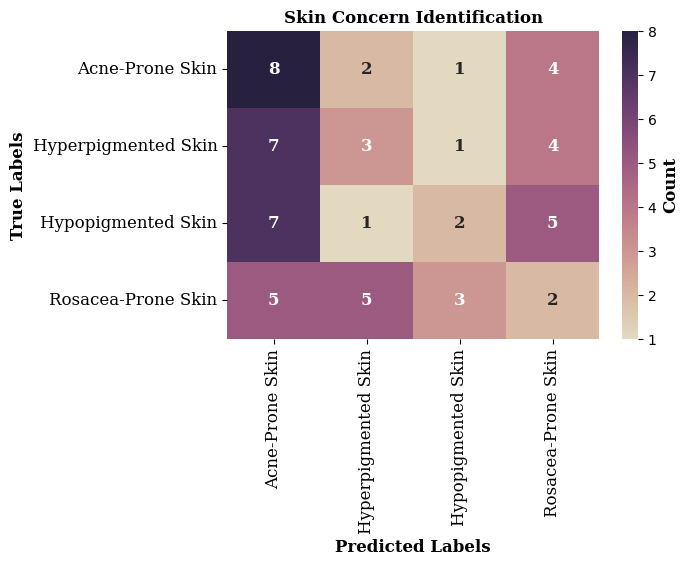

In [71]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, linecolor='white',
                      xticklabels=['Acne-Prone Skin', 'Hyperpigmented Skin','Hypopigmented Skin','Rosacea-Prone Skin'], yticklabels=['Acne-Prone Skin', 'Hyperpigmented Skin','Hypopigmented Skin','Rosacea-Prone Skin'],annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Skin Concern Identification', fontdict=font)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)

plt.show()


# **Prediction on random (3) images from test dataset**

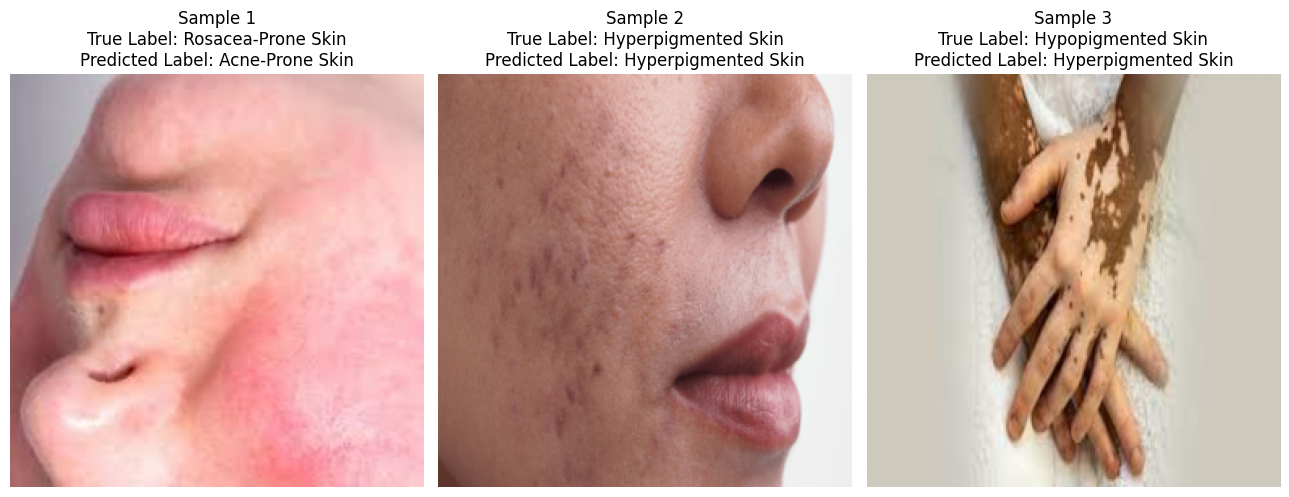

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Set models to evaluation mode
mobilenet_v2.eval()
bert_model.eval()

# Define the number of samples to display
num_samples = 3

fig, axes = plt.subplots(1, num_samples, figsize=(13, 5))

for i in range(num_samples):
    # Choose a random index
    idx = np.random.randint(len(test_loader.dataset))

    # Get the sample using the index
    image, text, label = test_loader.dataset[idx]

    # Move image tensor to the device and process it
    image = image.permute(1, 2, 0).numpy()  # Convert PyTorch tensor to numpy array

    # Display the image using Matplotlib
    axes[i].imshow(image)

    # Map encoded label to actual label
    true_label = label_encoder.inverse_transform([label.item()])[0]

    # Get the model's prediction
    with torch.no_grad():
        # Forward pass
        image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).to(device)  # Convert NumPy array to PyTorch tensor
        text = bert_tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt').to(device)  # Convert text to PyTorch tensor
        input_ids = text['input_ids']  # No need to add a batch dimension here
        attention_mask = text['attention_mask']  # No need to add a batch dimension here

        img_feats = mobilenet_v2(image).squeeze()
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        text_feats = outputs.last_hidden_state[:, 0, :]
        img_feats_reshaped = img_feats.view(1, -1)

        combined_feats = torch.cat((img_feats_reshaped, text_feats), dim=1)

        combined_logits = classifier(combined_feats)

        _, predicted_label = combined_logits.max(1)
        predicted_label = predicted_label.item()

        # Display the image and labels
        predicted_label_text = "Acne-Prone Skin" if predicted_label == 0 else "Hyperpigmented Skin" if predicted_label == 1 else "Hypopigmented Skin" if predicted_label == 2 else "Rosacea-Prone Skin"
        axes[i].set_title(f"Sample {i + 1}\nTrue Label: {true_label}\nPredicted Label: {predicted_label_text}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Saving the model, tokenizer and classifier**

In [74]:
# Save the mobilenet_v2 model
torch.save(mobilenet_v2.state_dict(), '/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mobilenet_v2_Model.pth')

# Save the mBERT model
torch.save(bert_model.state_dict(), '/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Model.pth')

# Save the tokenizer
bert_tokenizer.save_pretrained('/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json')


('/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json/tokenizer_config.json',
 '/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json/special_tokens_map.json',
 '/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json/vocab.txt',
 '/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json/added_tokens.json')

# **Loading the model, tokenizer and classifier**

In [75]:
# load the model
mobilenet_v2.load_state_dict(torch.load('/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mobilenet_v2_Model.pth'))
bert_model.load_state_dict(torch.load('/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Model.pth'))

# load the tokenizer
bert_tokenizer.from_pretrained('/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json')



BertTokenizer(name_or_path='/content/drive/MyDrive/Skin_Concern_Identification/multimodal_Skin_Concern_mBERT_Tokenizer.json', vocab_size=119547, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}